In [1]:
import matplotlib.pyplot as py
import seaborn as sb
import pandas as pd
import numpy as np

In [3]:
df  = sb.load_dataset('tips')

In [4]:
df.to_csv('tips1.csv')

In [5]:
df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [7]:
df.info

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
43,9.68,1.32,Male,No,Sun,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
128,11.38,2.00,Female,No,Thur,Lunch,2
25,17.81,2.34,Male,No,Sat,Dinner,4
101,15.38,3.00,Female,Yes,Fri,Dinner,2


Data Analysis with Pandas

# Data Analysis with Pandas


In [11]:
df.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [12]:
df2 = df.groupby('day').sum() # sum per day
#print(df2)
df2.drop('size',inplace = True,axis=1) # sum of size column is not relevent
df2['percent'] = df2['tip']/df2['total_bill']*100 # add percentage
df2.to_csv('df2.csv')
df2

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [14]:
df3 = df.groupby('smoker').sum() # sum per day
#print(df2)
df3['percent'] = df3['tip']/df3['total_bill']*100 # add percentage
df3.to_csv('df3.csv')
df3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [16]:
df4 = df.groupby(['day', 'size']).sum() # sum per day
#print(df2)
df4['percent'] = df4['tip']/df4['total_bill']*100 # add percentage
df4.to_csv('df3.csv')
df4.dropna()

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

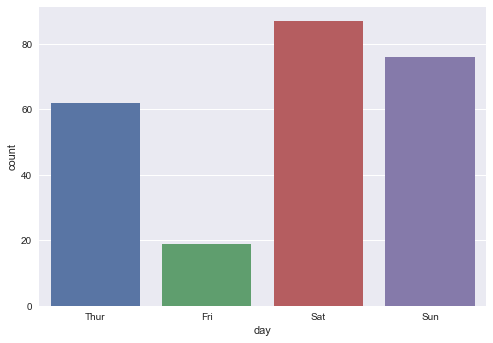

In [17]:
sb.countplot(x='day',data=df)
py.show()

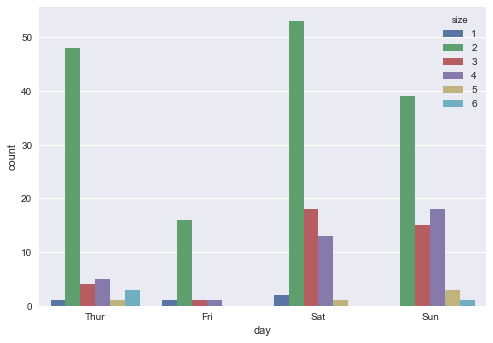

In [19]:
sb.countplot(x='day',hue='size',data=df)
py.show()

# Transform and cleaning the data

In [23]:
df.replace({'sex': {'Male':0 , 'Female': 1}, 'smoker': {'No':0 , 'Yes':1}}, inplace=True)
df.to_csv('df_replace.csv')
df.head()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,Sun,Dinner,2
1,10.34,1.66,0,0,Sun,Dinner,3
2,21.01,3.50,0,0,Sun,Dinner,3
3,23.68,3.31,0,0,Sun,Dinner,2
4,24.59,3.61,1,0,Sun,Dinner,4


# Using dummy variable

In [25]:
days = pd.get_dummies(df['day'])
days.sample(5)

,Thur,Fri,Sat,Sun
20,0,0,1,0
129,1,0,0,0
25,0,0,1,0
2,0,0,0,1
71,0,0,1,0


In [26]:
days = pd.get_dummies(df['day'], drop_first=True)
days.sample(6)

,Fri,Sat,Sun
181,0,0,1
155,0,0,1
184,0,0,1
177,0,0,1
163,0,0,1
134,0,0,0


In [27]:
days = pd.get_dummies(df['day'],drop_first=True)
#days.sample(6)
df = pd.concat([df,days],axis=1)
times = pd.get_dummies(df['time'],drop_first=True)
df = pd.concat([df,times],axis=1)
df.drop(['day','time'],inplace=True,axis=1)
df.to_csv('df_drop.csv')
df.head()

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,1,0,2,0,0,1,1
1,10.34,1.66,0,0,3,0,0,1,1
2,21.01,3.50,0,0,3,0,0,1,1
3,23.68,3.31,0,0,2,0,0,1,1
4,24.59,3.61,1,0,4,0,0,1,1


In [29]:
X = df[['sex', 'smoker','size','Fri','Sat','Sun','Dinner']]
Y = df[['tip']]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=26)

In [31]:
model  = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
predictions = model.predict(X_test)
print(predictions)

[[ 2.41307932]
 [ 2.00446276]
 [ 2.41307932]
 [ 4.11118843]
 [ 5.2185532 ]
 [ 4.43551409]
 [ 3.35045009]
 [ 2.87257137]
 [ 2.41569958]
 [ 3.40981996]
 [ 2.70845149]
 [ 2.93194124]
 [ 2.63918933]
 [ 4.05181856]
 [ 4.11118843]
 [ 2.70845149]
 [ 2.41569958]
 [ 3.35045009]
 [ 4.33467818]
 [ 2.42307646]
 [ 2.41569958]
 [ 2.41307932]
 [ 2.93194124]
 [ 3.11706805]
 [ 3.34782983]
 [ 3.63330971]
 [ 5.22117346]
 [ 2.64908162]
 [ 2.70845149]
 [ 2.70583123]
 [ 4.11118843]
 [ 3.57393984]
 [ 3.63330971]
 [ 2.92932099]
 [ 3.35045009]
 [ 2.70845149]
 [ 3.03277715]
 [ 2.22795252]
 [ 3.4071997 ]
 [ 2.92932099]
 [ 2.41569958]
 [ 4.51980499]
 [ 1.72170799]
 [ 2.87257137]
 [ 2.63656907]
 [ 2.70583123]
 [ 2.64908162]
 [ 2.64646136]
 [ 2.63918933]
 [ 2.63918933]
 [ 2.64908162]
 [ 2.92932099]
 [ 2.70845149]
 [ 2.41307932]
 [ 2.86995111]
 [ 4.75318703]
 [ 3.03015689]
 [ 3.33793754]
 [ 3.03015689]
 [ 2.80666713]
 [ 2.41307932]]


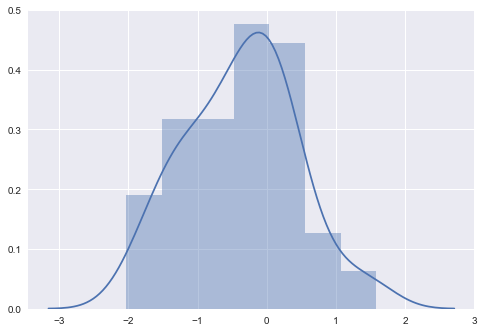

In [33]:
sb.distplot(y_test-predictions)
py.show()

In [34]:
myvals = np.array([0,1,3,1,0,0,0]).reshape(1,-1)
print(myvals)
myvals1 = np.array([0,1,3,1,0,0,0])
print(myvals1)

[[0 1 3 1 0 0 0]]
[0 1 3 1 0 0 0]


In [35]:
model.predict(myvals)

array([[ 3.12444493]])

In [36]:
myvals = np.array([0,1,3,1,0,0,1]).reshape(1,-1)
print(myvals)
a = model.predict(myvals)
print(a)

[[0 1 3 1 0 0 1]]
[[ 3.73414562]]
